# <center> Curso Machine Learning e Imágenes en Python
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Colaboradores: Ing. Juan Manuel López - Ing. Axel Aguerreberry -  Ing. Sebastián Palacio


## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	**Clasificación** de imágenes.
*	**Aprendizaje automático**
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 

**CLASE 10: 26-10-2021** 

    Clasificación y Aprendizaje automático supervisado  
   

# Aprendizaje supervisado

## Base, Datos:

 $X=\begin{bmatrix}
 x_{1 1}& \cdots  & x_{1 m}\\ 
 \vdots &  \ddots &\vdots \\
 x_{n 1}& \cdots  & x_{n m}
\end{bmatrix}$ 
y además $y=(y_{1},..,y_{n})$, o $ y=\begin{bmatrix}
 y_{1}\\ 
 \vdots \\
 y_{n}
\end{bmatrix}$



cada fila  $\underline{x}_i=(x_{i1},..,x_{im})$, acompañada de su etiqueta: 


$(\underline{x}_i,y_i)_{i=1..,n}$,

$m$ variables o características

$n=$ muestras u objetos

Cada  $y_i$ target, objetivo o etiqueta

Cuando:

- $y_i\in \{c_1,,..,c_k\}$, categórica, $\rightarrow$ Clasificación, donde $k=$ cantidad de clases.
- $y_i\in R$, numérica, $\rightarrow$ Regresión 

- Caso especial: $y_i\in \{0,1\}\equiv \{False, True\}\equiv \{Negativo, Positivo\}$ $\rightarrow$ Regresión logística, clasificación binaria

El **Aprendizaje automático** 

Busca predecir o "adivinar" la etiqueta $y_i$ usando $\underline{x}_i=(x_{i1},..,x_{im})$. 

Busca aprender, encontrar una función $f$ tal que

$f((x_{i1},..,x_{im}))=y_i$  o bien $f ( (x_{i1},..,x_{im}))\approx y_i$ para todos los $i$ y para cualquier nuevo vector de datos.

**Entrada:** $\;(x_{1},..,x_{m}) $   

**Modelo:** $\; f$ 

**Salida:** $ \; y$ 


$(x_{1},..,x_{m}) \rightarrow \, \sqsubset f \sqsupset  \,\rightarrow \, y$ 

$f: (x_{1},..,x_{m}) \rightarrow y$ 


## Partición de la Base:

Se dividen las n muestras/filas en dos (o 3) conjuntos:

- **Conjunto de Entrenamiento (y elección de modelo):**

   - Conj. de Entrenamiento *(70%)*

   - Conj. de validación *(10%)*

- **Conjunto de Test** *(20%)*


*los porcentajes pueden variar y el conj de validación puede unificarse con el de entrenamiento.*


Librerías necesarias

## Clasificación supervisada

### Algunos métodos

####  K vecinos más cercanos, K-NN

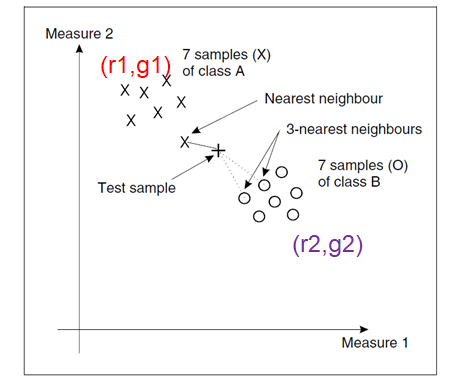

#### Arbol de decisión

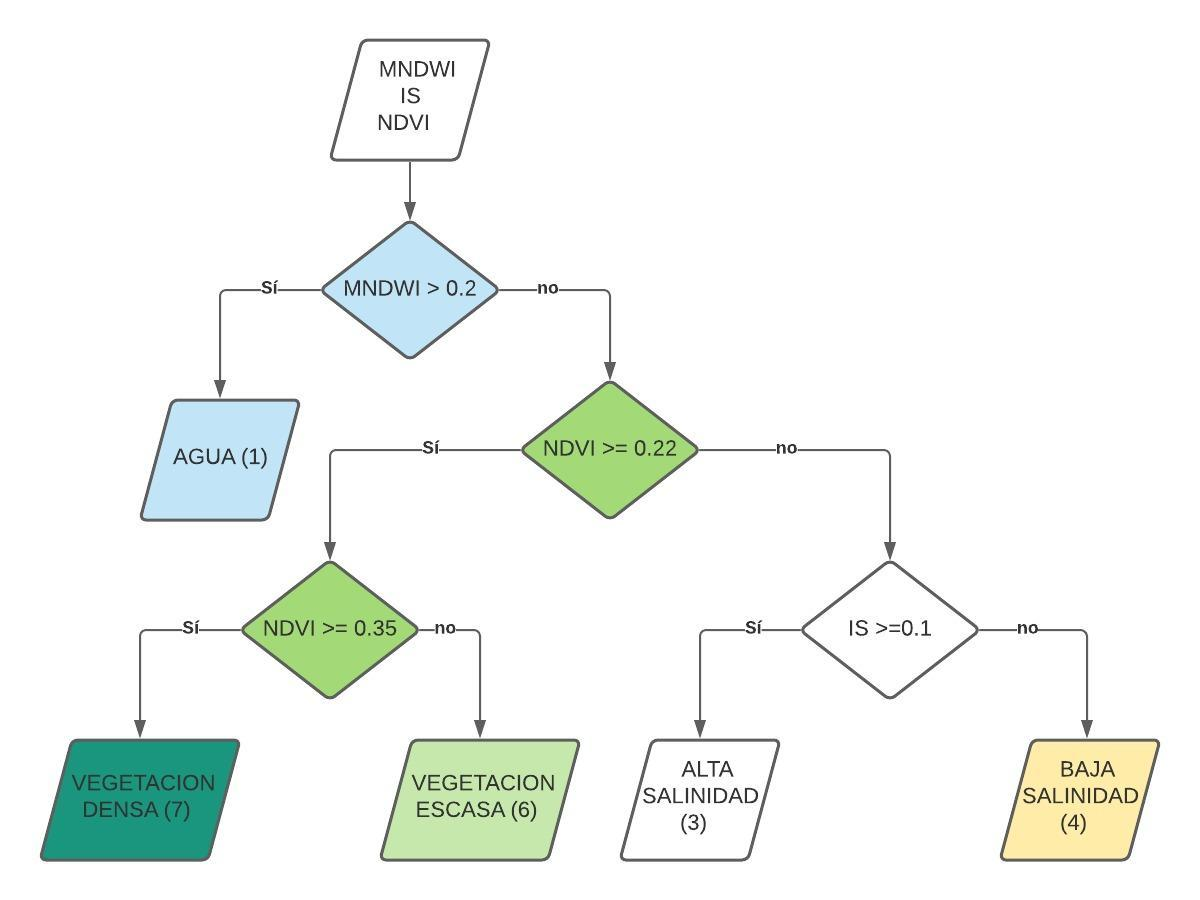

#### Random Forest

Consiste en entrenar varios árboles (Forest) de decisión, cada uno entrenado con un re-muestreo aleatorio (Random) del conj. de entrenamiento. Una vez entrenados, dada una nueva muestra  $(x_{1},..,x_{m})$ cada arbol da su veredicto y para esa muestra la predicción será la clase $y$ más votada. 

#### SVM, máquinas de vectores de soporte

Para dos clases, se puede adaptar para más de dos clases (one vs all).

La versión más simple: separación lineal. pero puede adaptarse a otro tipo de separaciones utilizando una función de kernel

- kernel trick: https://www.youtube.com/watch?v=3liCbRZPrZA


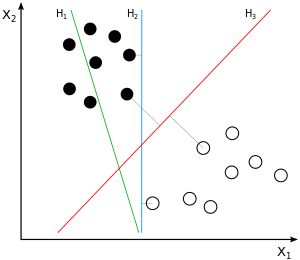

### Evaluación en clasificación supervisada

#### Matriz de confusión


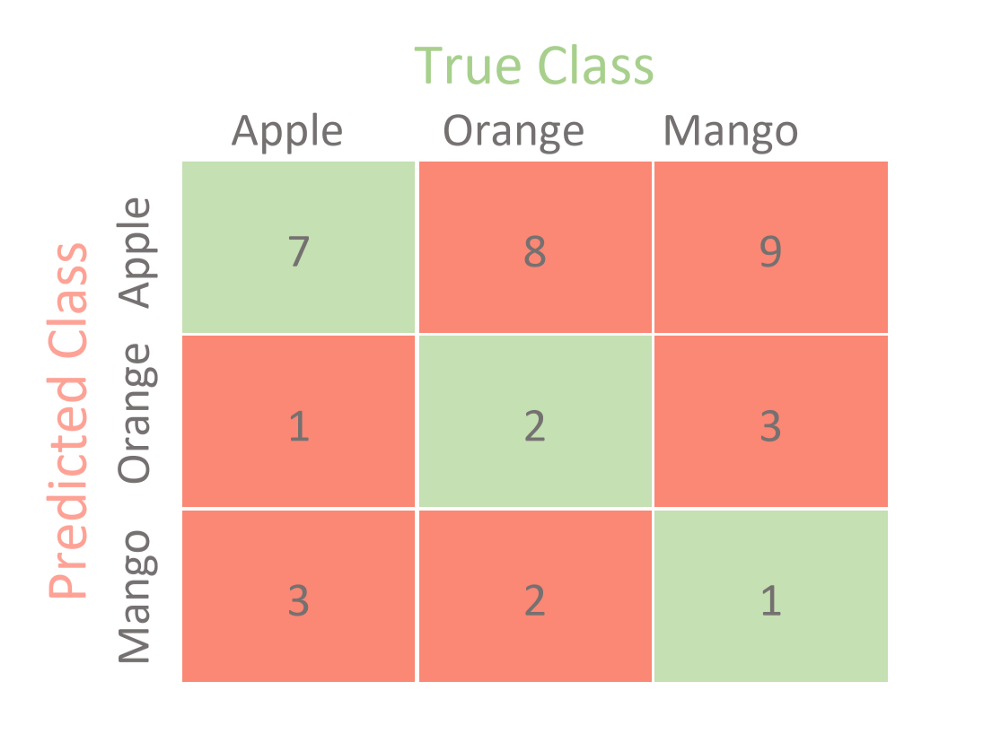




-Coeficiente Kappa (para dos o más clases)


**Matriz de Confusión para dos clases: Positivo y Negarivo**


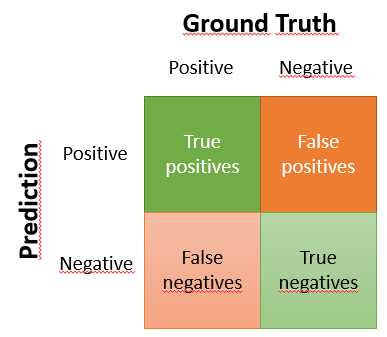

Precision $p=\frac{TP}{FP+TP}=$ Predictivo positivo

Recall $r=\frac{TP}{FP+FN}=$ Sensibilidad

F1-score $=\frac{2\, p \, r}{p+r}$

Accuracy $=\frac{TP+TN}{TP+FP+TN+FN}=$porcentaje de aciertos

Coeficiente de correlación de Mathews;
 $\phi= \frac{TP \; TN - FP \; FN }{\sqrt{(TP+FN)(FP+TN)(TP+FP)(FN+TN)}}$


## Práctica

Librerías necesarias

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (roc_auc_score,
                             make_scorer,
                             classification_report,
                             roc_curve,
                             f1_score,
                             matthews_corrcoef,
                             precision_score,
                             recall_score,
                             confusion_matrix)


## Cargamos el dataset

In [6]:
datos = load_wine()

df = pd.DataFrame(datos.data,
                           columns=datos.feature_names)

df['label'] = datos.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
print('y=',datos.target)
print(len(datos.target))
print('cantidad de cada clase: [59,71,48]')
print(datos.target_names)
print(datos.feature_names)

y= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
178
cantidad de cada clase: [59,71,48]
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Opcional: Nos quedamos con 2 clases, 130 filas, las primeras

In [7]:
#df = df.iloc[0:130]

In [8]:
X = df.drop(['label'], axis=1).values
y = df.label

Calcular las dimensiones de la (nueva) base:

## Separación de la base: Entrenamiento y Test

Spliteo entre Train y Test



In [9]:
X_train,X_test,  y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)  # para que mantenga la proporción por clase

**Ejercicio:**

Calcular la dimension de la base separada en conjuntos y graficar cada uno usando (subplot y) scatterplot , colorear las clases

### Entrenamos un Árbol y predecimos

In [10]:
#Entrenamos un Árbol de desición y predecimos:
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

pred_test=tree.predict(X_test)
proba_pred_test=tree.predict_proba(X_test)
print('predicciones: ', pred_test)
print('verdaderos:', y_test.values)

print(f"Tree Accuracy: {tree.score(X_test, y_test)}")


predicciones:  [0 1 1 0 0 2 1 1 1 1 2 1 0 1 0 0 1 0 0 1 2 2 2 1 1 1 0 2 2 1 0 1 2 1 2 0]
verdaderos: [0 1 1 0 0 2 1 1 1 1 2 1 0 0 0 0 1 0 0 1 2 2 2 2 1 1 0 2 2 1 0 1 2 1 2 0]
Tree Accuracy: 0.9444444444444444


In [11]:
print(confusion_matrix(pred_test, y_test))
pd.crosstab(index=pred_test,
            columns=y_test)


[[11  0  0]
 [ 1 14  1]
 [ 0  0  9]]


label,0,1,2
row_0,,,
0,11,0,0
1,1,14,1
2,0,0,9


F1 Score:

In [12]:
print(f"Test F1 Score: {np.round(f1_score(y_test, pred_test, average='macro'), 3)}")

Test F1 Score: 0.946


Coeficiente de Matthews

In [13]:
print(f"Test Coeficiente de Matthews: {np.round(matthews_corrcoef(y_test, pred_test), 3)}")

Test Coeficiente de Matthews: 0.919


### Random Forest 

ver: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [14]:
#Entrenamos un Árbol de desición y predecimos:

rf = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
rf.fit(X_train, y_train)

pred_rf_test=rf.predict(X_test)
proba_pred_test=rf.predict_proba(X_test)
print('predicciones RF: ', pred_rf_test)
print('verdaderos:', y_test.values)

print(f"RF Accuracy: {rf.score(X_test, y_test)}")

predicciones RF:  [0 1 1 0 0 2 1 1 1 1 2 1 0 0 0 0 1 0 0 1 2 2 2 2 1 0 0 2 2 1 0 1 2 1 2 0]
verdaderos: [0 1 1 0 0 2 1 1 1 1 2 1 0 0 0 0 1 0 0 1 2 2 2 2 1 1 0 2 2 1 0 1 2 1 2 0]
RF Accuracy: 0.9722222222222222


In [15]:
print( confusion_matrix(pred_rf_test, y_test))
pd.crosstab(index=pred_rf_test,
            columns=y_test)

[[12  1  0]
 [ 0 13  0]
 [ 0  0 10]]


label,0,1,2
row_0,,,
0,12,1,0
1,0,13,0
2,0,0,10


Ejercicio: predecir también en el conj de entenamiento y comparar

## Regresión

ver filminas

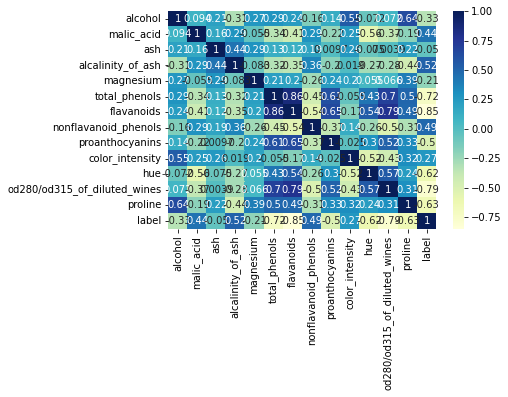

In [16]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
sns.set(rc={'figure.figsize':(15,12)})

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
var1=datos.feature_names[5]
var2=datos.feature_names[6]
var3=datos.feature_names[11]
print(var1)
print(var2)
print (var3)

total_phenols
flavanoids
od280/od315_of_diluted_wines


cantidad de observaciones: 178
cantidad de clases: 3
cantidad de variables/dimension: 13
se grafican de a dos (dimensión 2)


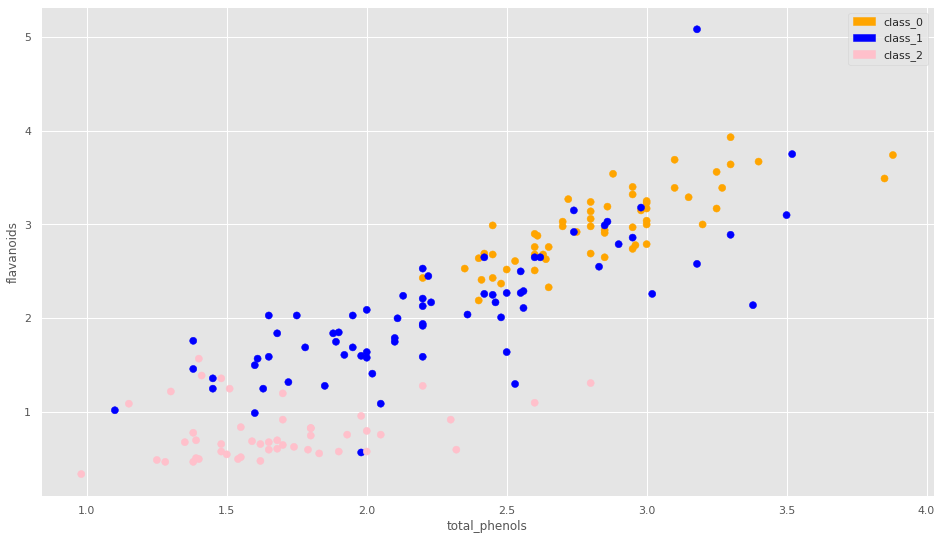

In [19]:
variable1="total_phenols"
variable2="flavanoids"
#variable2="od280/od315_of_diluted_wines"

f1 = df[variable1].values
f2 = df[variable2].values
f3 = datos.target

colores=['orange','blue','pink']
# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',13)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=50)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label=datos.target_names[0])
patch2 = mpatches.Patch(color=colores[1], label=datos.target_names[1])
patch3 = mpatches.Patch(color=colores[2], label=datos.target_names[2])
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

### Regresión Lineal simple
https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/


In [20]:
Xr_train = X[:,5:6] # regresoras deben formar una matriz, elijo col 5 a la 6 exclusive 
yr_train = df[var2].values #var dependiente debe ser un vector 
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(Xr_train, yr_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
yr_pred = regr.predict(Xr_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: ', regr.coef_) 
print('Independent term: ', regr.intercept_) # Este es el valor donde corta el eje Y (en X=0)

print("Mean squared error: %.2f" % mean_squared_error(yr_train, yr_pred)) # Error Cuadrado Medio
print("Root Mean squared error: %.2f" % (mean_squared_error(yr_train, yr_pred)**(1/2))) # Error Cuadrado Medio/
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score, R^2: %.2f' % r2_score(yr_train, yr_pred))

Coefficients:  [1.37984391]
Independent term:  -1.1376271584040634
Mean squared error: 0.25
Root Mean squared error: 0.50
Variance score, R^2: 0.75


Agregar la linea de regresión

In [ ]:
x1=np.linspace(0, 5 , num=10)
#beta0=
#beta1=
y_modelo= (beta1*x1  + beta0)

plt.scatter(f1, f2, s=50, color='blue')
#plt.plot(x1,y_modelo)
#plt.scatter(f1,yr_pred, color='red')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

### Regresión Lineal múltiples variables

In [22]:
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
X2r_train=X[:,[5,11]] #2 columnas, 2 regresoras
y2_train=df[var2].values #vector con la dependiente, el target
print('variable dependiente:', var2)

regr2.fit(X2r_train, y2_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
y2_pred = regr2.predict(X2r_train)
 
# Los coeficientes
print('Coefficients: ', regr2.coef_, ', Intercept: ', regr2.intercept_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(y2_train, y2_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score, R^2: %.2f' % r2_score(y2_train, y2_pred))

variable dependiente: flavanoids
Coefficients:  [0.98114626 0.50210616] , Intercept:  -1.5339145641091805
Mean squared error: 0.19
Variance score, R^2: 0.81


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

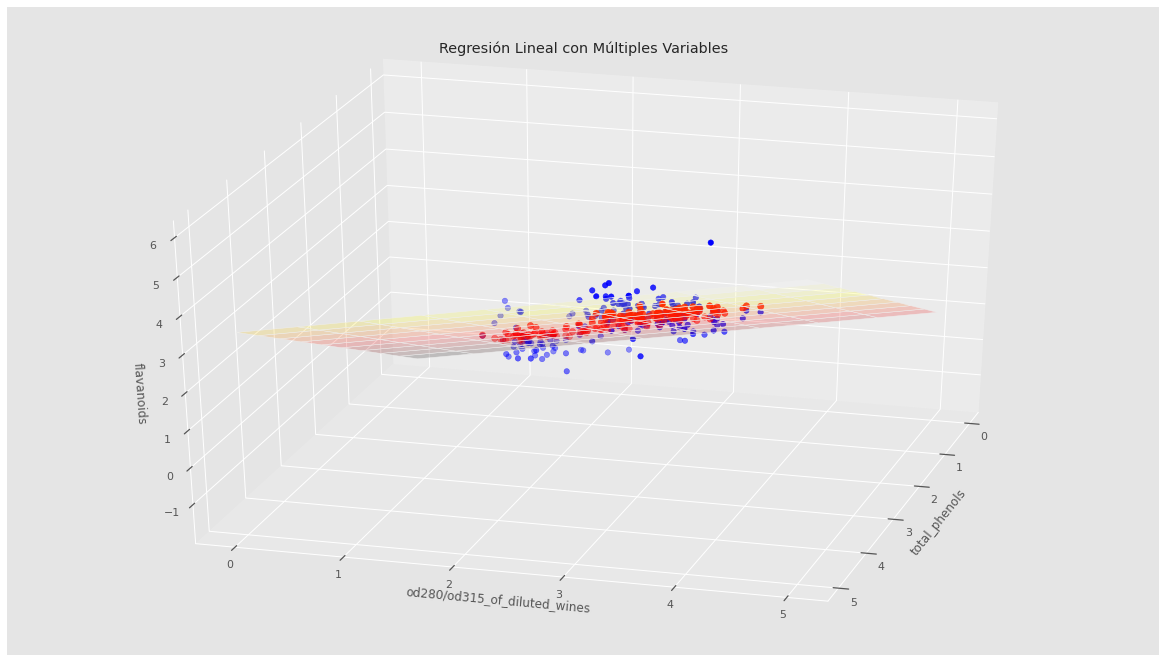

In [23]:
fig = plt.figure()
ax = Axes3D(fig)
# Creamos una malla, sobre la cual graficaremos el plano
x1, x2 = np.meshgrid(np.linspace(0, 5 , num=10), np.linspace(0, 5, num=10))
 
# calculamos los valores del plano para los puntos x e y
beta0= regr2.intercept_
beta1 = regr2.coef_[0] 
beta2 = regr2.coef_[1] 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
y_modelo= (beta1*x1 + beta2*x2 + beta0)
 
# Graficamos el plano
ax.plot_surface(x1,x2,y_modelo, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(X2r_train[:, 0], X2r_train[:, 1], y2_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(X2r_train[:, 0], X2r_train[:, 1], y2_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=16)
        
ax.set_xlabel(var1)
ax.set_ylabel(var3)
ax.set_zlabel(var2)
ax.set_title('Regresión Lineal con Múltiples Variables')